In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the csv file to be used for data analysis
data = pd.read_csv(r"C:\Users\USER\Documents\COURSES\Flit Apprenticeship\Projects\Market Basket Analysis - Groceries_dataset.csv")
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
for col in data.columns:
    print(data[col].describe())

count    38765.000000
mean      3003.641868
std       1153.611031
min       1000.000000
25%       2002.000000
50%       3005.000000
75%       4007.000000
max       5000.000000
Name: Member_number, dtype: float64
count          38765
unique           728
top       21-01-2015
freq              96
Name: Date, dtype: object
count          38765
unique           167
top       whole milk
freq            2502
Name: itemDescription, dtype: object


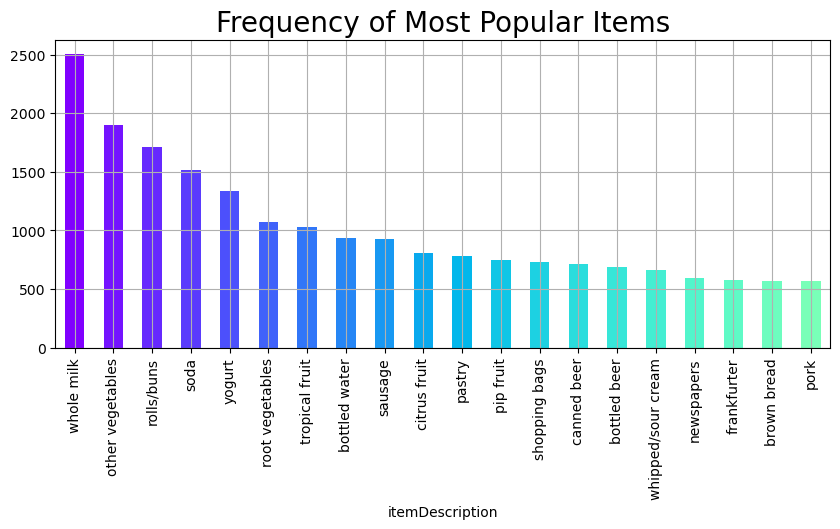

In [4]:
# Most Frequent Items Bar plot
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data['itemDescription'].value_counts().head(20).plot.bar(color = color, figsize = (10, 4))
plt.title('Frequency of Most Popular Items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [6]:
# Form a new column
data['Transaction'] = data['Member_number'].astype(str) + '_' + data['Date'].astype(str)
data.head()

,Member_number,Date,itemDescription,Transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


In [7]:
# Pivot table to have Items in columns while transactions in rows
data2 = pd.crosstab(data['Transaction'], data['itemDescription'])
data2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Encoding to 0 and 1
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

Basket_input = data2.applymap(encode)

# Market Basket Analysis

In [10]:
# install mlxtend
!pip install mlxtend

In [11]:
# import Apriori Algorithm from MLXtend and apply the algorithm to find frequent itemsets
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# convert the DataFrame to boolean type
Basket_input = Basket_input.astype('bool')

# find the frequent itemsets
frequent_itemsets = apriori(Basket_input, min_support = 0.01, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986


In [12]:
# sorting the frequent itemsets bought together
rules.sort_values(["support", "confidence", "lift"], axis = 0, ascending = False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


# Visualization

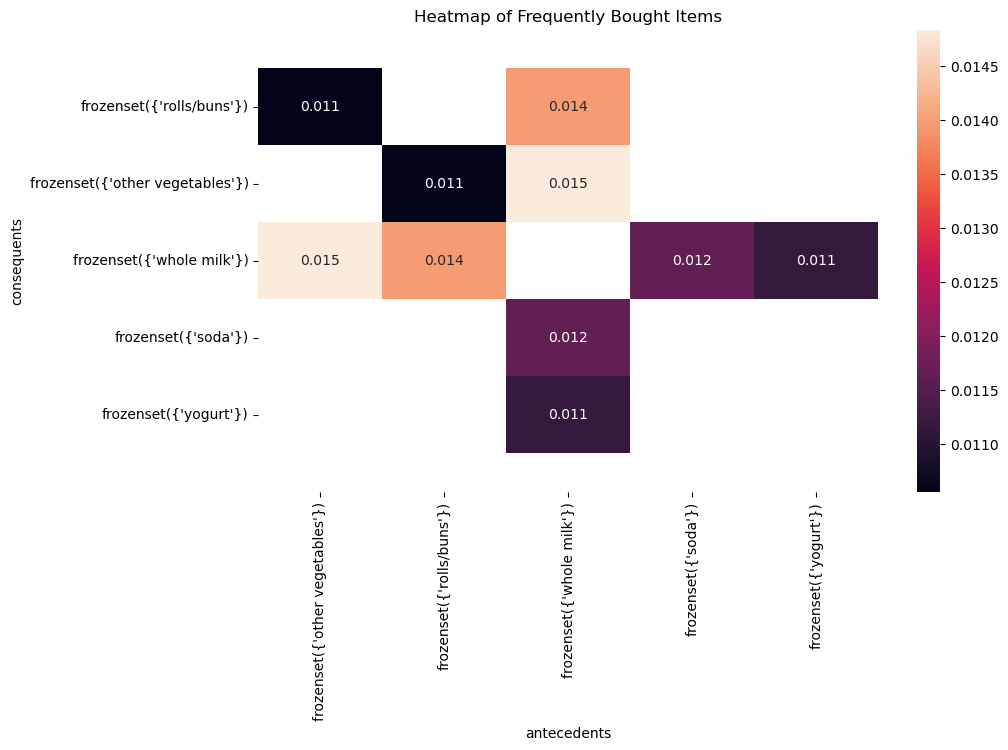

In [13]:
# transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index = 'consequents', columns = 'antecedents', values = 'support')

# Creating a heatmap visualization to display the consequents and antecedents
plt.figure(figsize = (10, 6))
sns.heatmap(support_table, annot = True, cbar = True)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.yticks(rotation = 0)
plt.title('Heatmap of Frequently Bought Items')

plt.show()

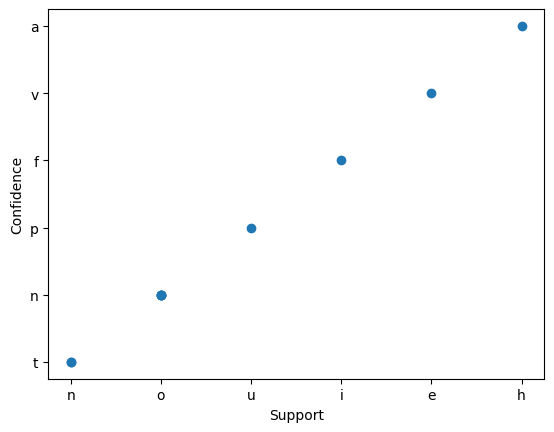

In [18]:
# extract the values of support and confidence
support_values = []
confidence_values = []
for rule in rules:
    support_values.append(rule[1])
    confidence_values.append(rule[2])
    
# create a scatter plot to show a trade-off between support and confidence
plt.scatter(support_values, confidence_values)
plt.xlabel('Support')
plt.ylabel('Confidence')

plt.show()